In [1]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
import random



In [2]:
def seed_everything(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True

seed_everything(1)

In [3]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        # convolution block 1        
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(1, 8, 3,bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(8),
#            nn.Dropout(0.05),

            nn.Conv2d(8, 8, 3,bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(8),
#            nn.Dropout(0.05)
        )

        # convolution block 2
        self.conv_block_2 = nn.Sequential(

            nn.Conv2d(8, 8, 3,bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(8),
 #           nn.Dropout(0.05)

        )

        # transition block 1
        self.transition_1 = nn.Sequential(
            nn.MaxPool2d(2, 2)
        )
        
        # convolution block 3
        self.conv_block_3 = nn.Sequential(
            nn.Conv2d(8, 16, 3,bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(16),
#            nn.Dropout(0.05), 

            nn.Conv2d(16, 16, 3,bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(16),
#            nn.Dropout(0.05), 

            nn.Conv2d(16, 16, 3,bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(16),
#            nn.Dropout(0.05), 

            nn.Conv2d(16, 10, 1,bias=False),

        
        )
        

        # op block
        self.gap = nn.Sequential(
            nn.AvgPool2d(kernel_size=5) 
        ) 

        # fully connected
#        self.fc1 = nn.Linear(16,10)


    def forward(self, x):

        x = self.conv_block_1(x)
        x = self.conv_block_2(x)
        x = self.transition_1(x)
        x = self.conv_block_3(x)
 
        # GAP 
#        x = F.adaptive_avg_pool2d(x, (4, 4))  # Input - 7x7x32 -> Output - 1x1x32
        x = self.gap(x)


# #        reshape using flatten
#         x = torch.flatten(x, 1)
# #        Fully connected layer
#         x = self.fc1(x) # 1x1x32 -> 1x1x10


        x = x.view(-1, 10)

        return F.log_softmax(x,dim=-1)

In [4]:
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 26, 26]              72
              ReLU-2            [-1, 8, 26, 26]               0
       BatchNorm2d-3            [-1, 8, 26, 26]              16
            Conv2d-4            [-1, 8, 24, 24]             576
              ReLU-5            [-1, 8, 24, 24]               0
       BatchNorm2d-6            [-1, 8, 24, 24]              16
            Conv2d-7            [-1, 8, 22, 22]             576
              ReLU-8            [-1, 8, 22, 22]               0
       BatchNorm2d-9            [-1, 8, 22, 22]              16
        MaxPool2d-10            [-1, 8, 11, 11]               0
           Conv2d-11             [-1, 16, 9, 9]           1,152
             ReLU-12             [-1, 16, 9, 9]               0
      BatchNorm2d-13             [-1, 16, 9, 9]              32
           Conv2d-14             [-1, 1

In [5]:
model

Net(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (1): ReLU()
    (2): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (4): ReLU()
    (5): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (1): ReLU()
    (2): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (transition_1): Sequential(
    (0): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_3): Sequential(
    (0): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (1): ReLU()
    (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (4): ReLU(

```
-----------------------------------------------------------------------------------------------------
        Layer (type)               Output Shape         Param #        Input        Output      RF
=====================================================================================================
            Conv2d-1            [-1, 8, 26, 26]              72        28x28        26x26       3x3
              ReLU-2            [-1, 8, 26, 26]               0
       BatchNorm2d-3            [-1, 8, 26, 26]              16
            Conv2d-4            [-1, 8, 24, 24]             576        26x26        24x24       5x5
              ReLU-5            [-1, 8, 24, 24]               0
       BatchNorm2d-6            [-1, 8, 24, 24]              16
            Conv2d-7            [-1, 8, 22, 22]             576        24x24        22x22       7x7
              ReLU-8            [-1, 8, 22, 22]               0
       BatchNorm2d-9            [-1, 8, 22, 22]              16
        MaxPool2d-10            [-1, 8, 11, 11]               0        22x22        11x11       7x7
           Conv2d-11             [-1, 16, 9, 9]           1,152        11x11         9x9       11x11
             ReLU-12             [-1, 16, 9, 9]               0
      BatchNorm2d-13             [-1, 16, 9, 9]              32
           Conv2d-14             [-1, 16, 7, 7]           2,304         9x9          7x7       15x15
             ReLU-15             [-1, 16, 7, 7]               0
      BatchNorm2d-16             [-1, 16, 7, 7]              32
           Conv2d-17             [-1, 16, 5, 5]           2,304         7x7          5x5       19x19
             ReLU-18             [-1, 16, 5, 5]               0
      BatchNorm2d-19             [-1, 16, 5, 5]              32
           Conv2d-20             [-1, 10, 5, 5]             160         5x5          5x5       19x19
        AvgPool2d-21             [-1, 10, 1, 1]               0         5x5          1x1       27x27
=====================================================================================================
```

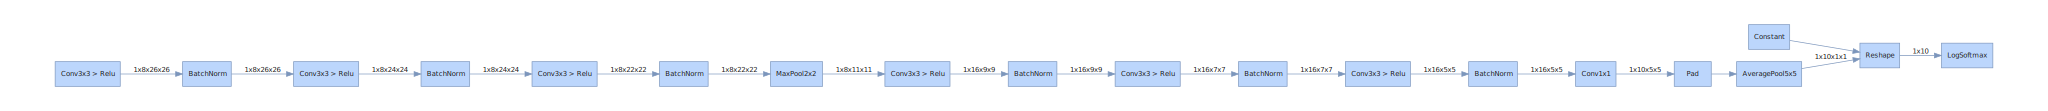

In [15]:
import hiddenlayer as hl
hl_graph=hl.build_graph(model, torch.zeros([1,1, 28, 28]).cuda())
hl_graph.theme = hl.graph.THEMES["blue"].copy()  # Two options: basic and blue
hl_graph

In [6]:
#torch.manual_seed(1)
batch_size = 128

kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('./data', train=True, download=False,
                    transform=transforms.Compose([
                        transforms.RandomAffine(degrees=10, translate=(0.1,0.1), scale=(0.9, 1.1)),
                        transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
#                        transforms.RandomCrop(28 , padding = 1),
                        transforms.ToTensor(),
                        transforms.Normalize((0.1307,), (0.3081,))
                    ])),
    batch_size=batch_size, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('./data', train=False, transform=transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize((0.1307,), (0.3081,))
                    ])),
    batch_size=batch_size, shuffle=True, **kwargs)

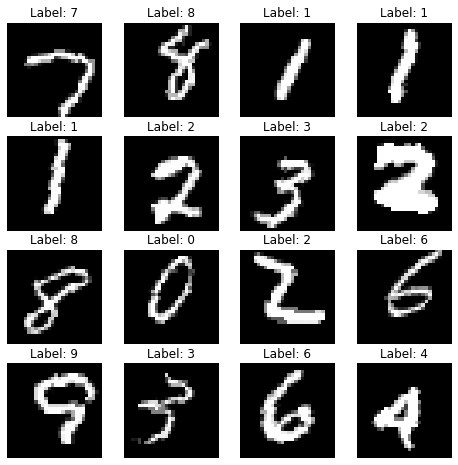

In [7]:
def show_batch(dl):
    images, labels = next(iter(dl))
    plt.figure(figsize=(8, 8))
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        ax.imshow(torch.squeeze(images[i], axis=0), cmap='gray')
        plt.title(f'Label: {labels[i].item()}')
        plt.axis('off')

show_batch(train_loader)

In [8]:
from tqdm import tqdm
def train(model, device, train_loader, optimizer, epoch):
    correct = 0
    model.train()
    pbar = tqdm(train_loader)
    per_batch_loss = []

    for batch_idx, (data, target) in enumerate(pbar):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)

        pred = output.argmax(dim=1, keepdim=True)          
        correct += pred.eq(target.view_as(pred)).sum().item()

        loss = F.nll_loss(output, target)
        per_batch_loss.append(loss.item())
        loss.backward()
        optimizer.step()
#        pbar.set_description(desc= f'loss={loss.item()} batch_id={batch_idx}')

    
    per_epoch_loss = sum(per_batch_loss)/len(per_batch_loss)
    per_epoch_accuracy = 100.*( correct / len(train_loader.dataset))
    
    return per_epoch_loss, per_epoch_accuracy

def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    # print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
    #     test_loss, correct, len(test_loader.dataset),
    #     100. * correct / len(test_loader.dataset)))


    return test_loss , 100. * correct / len(test_loader.dataset)


In [9]:
from torch.optim.lr_scheduler import StepLR

model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.015, momentum=0.9) 
scheduler = StepLR(optimizer, step_size=6, gamma=0.1)




loss_train = []
accuracy_train = []
loss_test = []
accuracy_test = []
epochs = 15

for epoch in range(0, epochs):
    print('============== EPOCH ', epoch)
    loss_train_epoch,accuracy_train_epoch = train(model, device, train_loader, optimizer, epoch)
    loss_test_epoch, accuracy_test_epoch = test(model, device, test_loader)
    scheduler.step()
    
    loss_train.append(loss_train_epoch)
    accuracy_train.append(accuracy_train_epoch)

    loss_test.append(loss_test_epoch)
    accuracy_test.append(accuracy_test_epoch)

    print(f'\t Train accuracy : {accuracy_train_epoch} , Test Accuracy: {accuracy_test_epoch}')
    print(f'\t Train Loss: {loss_train_epoch} , Test Loss: {loss_test_epoch}')
    

def plot_loss(train_loss, test_loss):
    plt.figure(figsize=(8,6))
    plt.plot(np.linspace(1, epochs, epochs).astype(int),loss_train,'-x')
    plt.plot(np.linspace(1, epochs, epochs).astype(int),loss_test,'-x')
    plt.legend(['train_loss', 'test_loss'])
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.title('Loss vs. No. of epochs')


def plot_accuracy(train_acc, test_acc):
    plt.figure(figsize=(8,6))
    plt.plot(np.linspace(1, epochs, epochs).astype(int),train_acc,'-x')
    plt.plot(np.linspace(1, epochs, epochs).astype(int),test_acc,'-x')
    plt.legend(['train_acc', 'test_acc'])
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs')


  0%|          | 0/469 [00:00<?, ?it/s]	 Train accuracy : 86.80333333333333 , Test Accuracy: 97.78
	 Train Loss: 0.45093635460143405 , Test Loss: 0.07462896285057068
============== EPOCH  1
  0%|          | 0/469 [00:00<?, ?it/s]	 Train accuracy : 96.905 , Test Accuracy: 98.52
	 Train Loss: 0.10777327538267381 , Test Loss: 0.0464475081205368
============== EPOCH  2
  0%|          | 0/469 [00:00<?, ?it/s]	 Train accuracy : 97.575 , Test Accuracy: 99.03
	 Train Loss: 0.08294396853443783 , Test Loss: 0.02984009292125702
============== EPOCH  3
  0%|          | 0/469 [00:00<?, ?it/s]	 Train accuracy : 97.84833333333334 , Test Accuracy: 98.62
	 Train Loss: 0.07315661113605952 , Test Loss: 0.03978343122005463
============== EPOCH  4
  0%|          | 0/469 [00:00<?, ?it/s]	 Train accuracy : 97.905 , Test Accuracy: 99.04
	 Train Loss: 0.06863106392832326 , Test Loss: 0.027060787129402162
============== EPOCH  5
  0%|          | 0/469 [00:00<?, ?it/s]	 Train accuracy : 98.22999999999999 , Test 

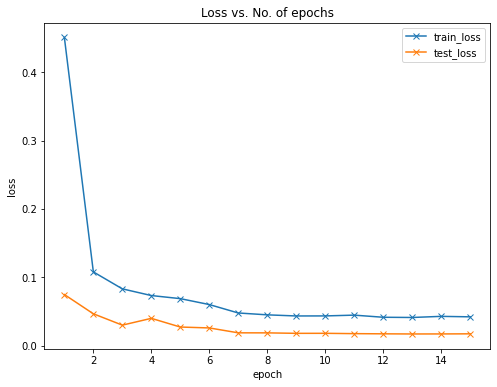

In [10]:
plot_loss(loss_train,loss_test)

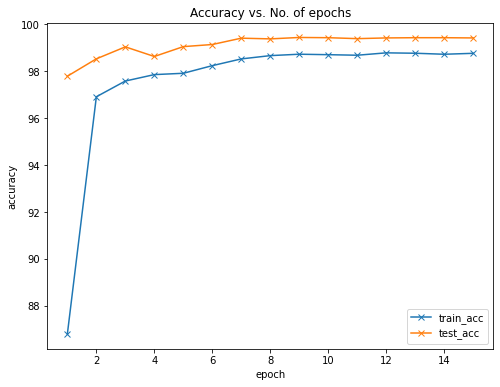

In [11]:
plot_accuracy(accuracy_train,accuracy_test)

Target:  
    
    Aim to reduce the underfitting, by lowering the reguralisation
    

Info:

    Lower the Reguralisation with:
        1. Removed all dropouts, since already the parameters are very less 
        2. Removed Random_crop, reduced the Augmentation parameters
    
    Also added Step_LR scheduler

Result:
        Parameters: 7,288  
        Best Training Accuracy: 98.75  
        Best Test Accuracy: 99.43

Analysis:

        Best model so far, that consistently gave >99.4% for last 4 epochs
        
        1. There is still room for improvement as training accuracy was only 98.75, so increasing the capacity might help
        2. We got 99.43 once, in 8th epoch but it dropped to 99.37, and was bit inconsistent,although recovered in the end, hence we try to make it smoother.
        




        
